## Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Decision Boundary

 3. Logistic Regression - Multiclass Classification I

 4. Logistic Regression - Multiclass Classification II




----

#### Getting Started:

1. Click on this link to open the Colab file for this project.

     https://colab.research.google.com/drive/1H4TAhvov035k7DNHBBRiUwd2VHiT0QaL  

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project80** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

In this project, you are going to create your synthetic data for multiclass classification, synthesize the data for training, and create a Random Forest Classification model and a Logistic Regression model to classify the data using Machine Learning. Conclude the project by comparing the models and their results.


---

### List of Activities

**Activity 1:** Create the Dummy Dataset

**Activity 2:**  Dataset Inspection

**Activity 3:**  Train-Test Split

**Activity 4:** Apply SMOTE

**Activity 5:** Random Forest Classification - Model Training

**Activity 6:** Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**Activity 7:** Logistic Regression - Model Training

**Activity 8:** Logistic Regression - Model Prediction and Evaluation (Testing Set)


---

#### Activity 1: Create the Dummy Dataset

In this activity, you have to create a dummy dataset for multiclass classification.

The steps to be followed are as follows:

**1.** Create a dummy dataset having two columns representing two independent variables and a third column representing the target.  

  The number of records should be divided into 6 random groups like `[500, 2270, 1900, 41, 2121, 272]` such that the target columns has 6 different labels `[0, 1, 2, 3, 4, 5]`.


  **Recall:**

  To create a dummy data-frame, use the `make_blob()` function of the `sklearn.datasets` module which will return two arrays `feature_array` and the `target_array`. The syntax for the `make_blob()` function is as follows:

  **Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`



In [ ]:
# Instruction to remove warning messages
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables.
features_array,target_array = make_blobs(n_samples =[500, 2270, 1900, 41, 2121, 272],centers = None ,n_features = 2 ,cluster_std= 1 ,random_state = 42 )

**Hint:**

In the `make_blobs()` function use `n_samples=[500, 2270, 1900, 41, 2121, 272]` and `center=None` for the division of target label into seven groups.

----
**2.** Print the object-type of the arrays created by the `make_blob()` function and also print the number of rows and columns in them:

In [ ]:
# Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
# Print the type of 'features_array' and 'target_array'
print(f"type of features array:  {type(features_array)}")
print(f"type of target array:    {type(target_array)}")
print("----"*10)
# Print the number of rows and column of 'features_array'
print(f"Number of rows & columns of feature array: {features_array.shape}")

# Print the number of rows and column of 'target_array'
print(f"Number of rows & columns of target array:  {target_array.shape}")

type of features array:  <class 'numpy.ndarray'>
type of target array:    <class 'numpy.ndarray'>
----------------------------------------
Number of rows & columns of feature array: (7104, 2)
Number of rows & columns of target array:  (7104,)


**Q:** How many rows are created in the feature and target columns?

**A:** 7104 rows  are created in the feature and target columns .

----
**3.** Create a DataFrame from the two arrays using a Python dictionary.

**Steps: (Learned in "Logistic Regression - Decision Boundary" lesson**)
- Create a dummy dictionary.

- Add the feature columns as keys `col 1`, `col 2`, and target column as the `target`.

- Add the values from the feature and target columns one by one respectively in the dictionary using List Comprehension.

- Convert the dictionary into a DataFrame

- Print the first five rows of the DataFrame.

In [ ]:
# Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.
# Import the module
import pandas as pd

# Create a dummy dictionary
dummy_dict = {'col 1':[features_array[i][0] for i in range(features_array.shape[0])],
              'col 2':[features_array[i][1] for i in range(target_array.shape[0])],
              'target' : target_array}

# Convert the dictionary into DataFrame
dummy_df = pd.DataFrame.from_dict(dummy_dict)
# Print first five rows of the DataFrame
dummy_df.head()

,col 1,col 2,target
0,4.110901,0.916612,1
1,-6.456119,-8.484815,2
2,4.823713,4.666203,1
3,-6.440477,-6.046930,2
4,1.395249,5.368955,4


**Hint:**

Use function `from_dict()` to convert Python Dictionary to DataFrame.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

**After this activity, the DataFrame should be created with two independent features columns and one dependent target column.**

----

#### Activity 2: Dataset Inspection

In this activity, you have to look into the distribution of the labels in the `target` column of the DataFrame.

**1.** Print the number of occurrences of each label in the `target` column:

In [ ]:
# Display the number of occurrences of each label in the 'target' column.
dummy_df['target'].value_counts()

1    2270
4    2121
2    1900
0     500
5     272
3      41
Name: target, dtype: int64

**2.** Print the percentage of the samples for each label in the `target` column:

In [ ]:
# Get the percentage of count of each label samples in the dataset.
dummy_df['target'].value_counts(normalize=True)

1    0.319538
4    0.298564
2    0.267455
0    0.070383
5    0.038288
3    0.005771
Name: target, dtype: float64

**Q:** How many unique labels are present in the DataFrame? What are they?

**A:** There are 6 unique labels present in the DataFrame.

**Q:** Is the DataFrame balanced?

**A:** No, the DataFrame is not balanced.



**3.**  Create a scatter plot between the columns `col 1` and `col 2` for all the labels to visualize the clusters of every label (or points):

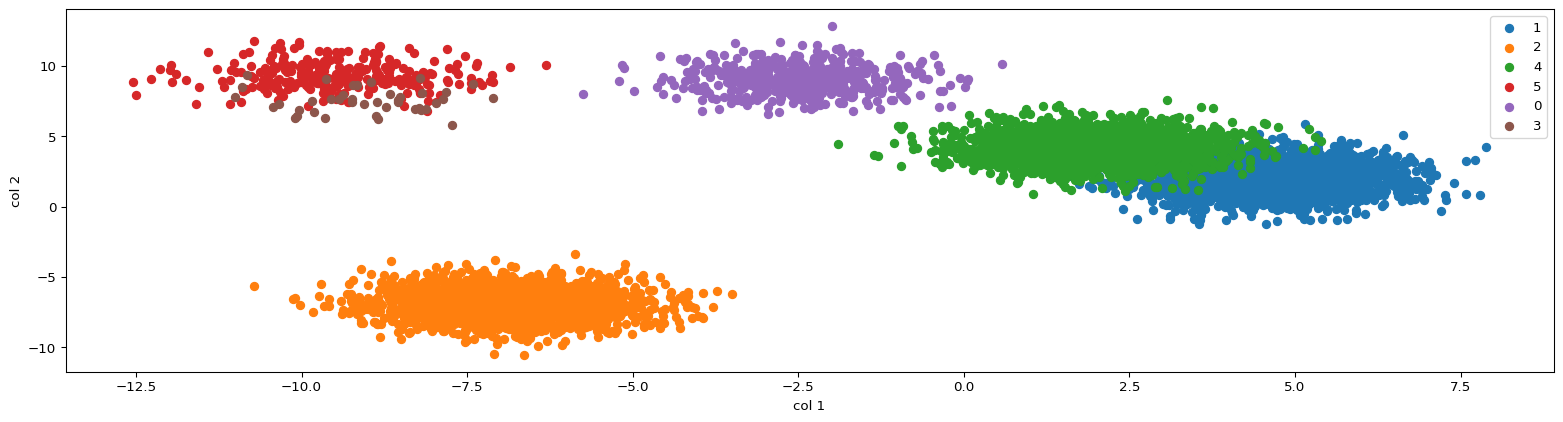

In [ ]:
# Create a scatter plot between 'col 1' and 'col 2' columns separately for all the labels in the same plot.

# Import the module
import matplotlib.pyplot as plt


# Define the size of the graph
plt.figure(figsize=(20,5),dpi = 96)
# Create a for loop executing for every unique label in the `target` column.
for i in dummy_df['target'].unique():

  # Plot the scatter plot for 'col 1' and 'col 2' where 'target ==i"
    plt.scatter(dummy_df.loc[dummy_df['target']==i,'col 1'],dummy_df.loc[dummy_df['target']==i,'col 2'],label=i)

# Plot the x and y lables
plt.xlabel('col 1')
plt.ylabel('col 2')
# Display the legends and the graph
plt.legend()
plt.show()

**Hint:**
Revise the lesson "Logistic Regression - Decision Boundary".

**After this activity, the labels to be predicted that is the target variables and their distribution should be known.**

----

#### Activity 3: Train-Test Split

We need to predict the value of the `target` variable, using other variables. Thus, the `target` is the dependent variable and other columns are the independent variables.

**1.** Split the dataset into the training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**2.** Set `random_state = 42`.

In [ ]:
# Import 'train_test_split' module
from sklearn.model_selection import train_test_split

# Create the features data frame holding all the columns except the last column
# and print first five rows of this dataframe
features = dummy_df.columns[:-1]
X = dummy_df[features]
# Create the target series that holds last column 'target'
# and print first five rows of this series
y = dummy_df['target']

# Split the train and test sets using the 'train_test_split()' function.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

**3.** Print the number of rows and columns in the training and testing set:

In [ ]:
# Print the shape of all the four variables i.e. 'X_train', 'X_test', 'y_train' and 'y_test'
print(f"X Train shape : {X_train.shape}")
print(f"X Test shape :  {X_test.shape}")
print("----"*10)
print(f"y Train shape : {y_train.shape}")
print(f"y Test shape :  {y_test.shape}")

X Train shape : (4972, 2)
X Test shape :  (2132, 2)
----------------------------------------
y Train shape : (4972,)
y Test shape :  (2132,)


**After this activity, the features and target data should be split into training and testing data.**

----

#### Activity 4: Apply SMOTE

In this activity, if the data is imbalanced, oversample the data for the minority classes in the following way:

1. Create an object for the SMOTE using `SMOTE()` function.
2. Synthesize the data for the minority class using `fit_sample()` function by passing the feature and target training variable.
3. Save the output of the above step, artificial data, in the new feature and target training variables.

In [ ]:
# Write the code to apply oversample the data.
# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE

# Call the 'SMOTE()' function and store it in the a variable.
smote = SMOTE(sampling_strategy = 'all',random_state = 42)
# Call the 'fit_resample()' function.
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

Print the number of rows and columns in the original and artificial feature and target data:

In [ ]:
# Print the number of rows and columns in the original and  resampled data.
print(f"X Train  original shape : {X_train.shape}")
print(f"X Train resampled :  {X_train_resampled.shape}")
print("----"*10)
print(f"y Train  original shape : {y_train.shape}")
print(f"y Train resampled:  {y_train_resampled.shape}")


X Train  original shape : (4972, 2)
X Train resampled :  (9510, 2)
----------------------------------------
y Train  original shape : (4972,)
y Train resampled:  (9510,)


**Q:** How many rows and columns are there in the original features data?

**A:** In X_train dataset `9510 rows & 2 columns ` and y_train dataset `4972 rows and no columns`.

**Q:** How many rows and columns are there in the artificially generated features data?

**A:** In X_train resampled dataset `4972 rows & 2 columns ` and y_train resampled dataset `9510 rows and no columns`.

----
Print the number of occurrences of labels in the artificially generated target data:

In [ ]:
# Display the number of occurrences of each label in the artificially target data.
y_train_resampled = pd.Series(y_train_resampled)
print(y_train_resampled.value_counts())

4    1585
1    1585
2    1585
0    1585
5    1585
3    1585
Name: target, dtype: int64


**Q.** Are the number of occurrances equal for all the labels?

**A** `Yes`

**After this activity, the training feature and target data should have the synthetic data such that all the labels have equal occurrances and the data is balanced**

----

#### Activity 5: Random Forest Classification - Model Training

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using the `score()` function using the object created.


In [ ]:
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_train,y_train)

0.9997988736926791

**Q:** What is the accuracy score?

**A:** 1

**Q:** Is it 100%?

**A:** `Yes`

**After this activity, a Random Forest Classification model object should be trained for multiclass classification.**

---

#### Activity 6: Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the testing set by calling the `predict()` function on the Random Forest Classifier object.

**2.** Print the unique labels predicted using Random Forest Regression on training features.

**3.** Print the distribution of the labels predicted in the predicted target series for the testing features.


In [ ]:
# Make predictions using Random Forest Classifier model object
# Make predictions on the test dataset by using the 'predict()' function.
rf_clf_test_pred = pd.Series(rf_clf.predict(X_test))

# Check the count of records classified under each label
# Print the unique labels in the predicted series for testing features
print("Unique counts :",rf_clf_test_pred.unique())

# Print the distribution labels in the predicted series for testing features
print("Distribution Labels\n", rf_clf_test_pred.value_counts())

Unique counts : [4 0 2 1 5 3]
Distribution Labels
 1    684
4    665
2    539
0    159
5     77
3      8
dtype: int64


**Q:** Are all the label values predicted for the testing features data?

**A:** yes

$$ $$
**Q:** Which labels are predicted and not predicted by the Random Forest Classification model?

**A:** `class 1` & `class 3` are been correctly predicted and rest others are not predicted correctly.

---
**4.** Display the confusion matrix for the testing set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
rf_test_confus_matrix  = confusion_matrix(y_test,rf_clf_test_pred)
rf_test_confus_matrix

array([[159,   0,   0,   0,   0,   0],
       [  0, 644,   0,   0,  41,   0],
       [  0,   0, 539,   0,   0,   0],
       [  0,   0,   0,   2,   0,   7],
       [  0,  40,   0,   0, 624,   0],
       [  0,   0,   0,   6,   0,  70]])

**5.** Visualize the confusion matrix using the heatmap:

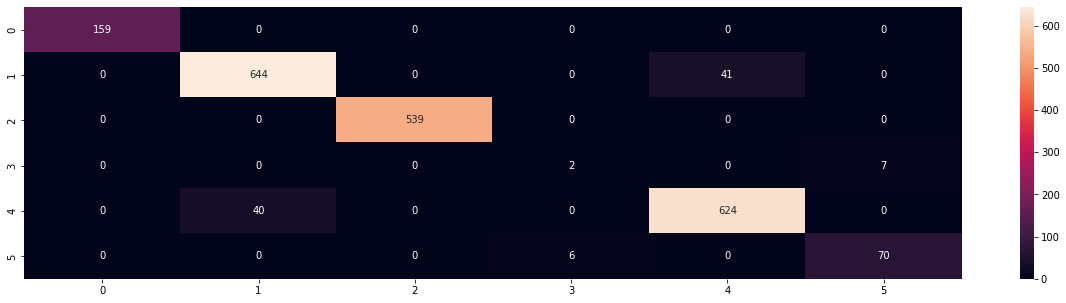

In [ ]:
# Create the heatmap for the confusion matrix
# import the module
import seaborn as sns

# Create a series of all unique labels in actual target data
labels = pd.Series(y_train_resampled).sort_values(ascending = True).unique()

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
rf_test_conf_df = pd.DataFrame(rf_test_confus_matrix,columns=labels, index = labels)
# Create a heatmap for the confusion matrix.
plt.figure(figsize=(21,5))
sns.heatmap(rf_test_conf_df, annot=True, fmt='d')
plt.show()

**Note:** Use `fmt='d'` as one of the parameters in the `heatmap()` to display the values in plain notation.

**Q.** Explain the heat map output in short based on the number of positive and negative outcomes for each class?

**A**

---
**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test,rf_clf_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       0.94      0.94      0.94       685
           2       1.00      1.00      1.00       539
           3       0.25      0.22      0.24         9
           4       0.94      0.94      0.94       664
           5       0.91      0.92      0.92        76

    accuracy                           0.96      2132
   macro avg       0.84      0.84      0.84      2132
weighted avg       0.96      0.96      0.96      2132



**Q** Which classes were identified correctly without any misclassification?

**A** classes 0,1,2,4 and 5 were identified correctly without any misclassification.

**Q** Which class has the lowest f1-score?

**A** class 3


**After this activity, labels should be predicted for the target columns using the test features set and the Random Forest Classifier model should be evaluated for the same.**

---

#### Activity 7: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print the score using the `score()` function.


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

# 1. First, call the 'LogisticRegression' module and store it in 'lg_clg' variable.
lg_clg = LogisticRegression()
# 2. Call the 'fit()' function with 'X_train' and 'y_train' as inputs.
lg_clg.fit(X_train,y_train)
# 3. Call the 'score()' function with 'X_train' and 'y_train' as inputs to check the accuracy score of the model.
lg_clg.score(X_train,y_train)

0.9748592115848753

**Q:** What is the accuracy score?

**A:** nearly 97% is accuracy score.

**Q:** Is it 100%?

**A:** No

**After this activity, a Logistic Regression model object should be trained for multiclass classification.**

----

#### Activity 8: Logistic Regression - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the test set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the unique labels predicted using Logistic Regression on test features.

**3.** Print the distribution of the labels predicted in the predicted target series for the test features.


In [ ]:
# Predict the values of 'target' by the logistic regression model on the test set.
# Predict the target for the test features data
y_test_pred = lg_clg.predict(X_test)

# Convert the predicted array into series
y_test_pred = pd.Series(y_test_pred)
# Print the unique labels in the predicted series for test features
print(y_test_pred.unique(),"\n")
# Print the distribution labels in the predicted series for test features
print(y_test_pred.value_counts())

[4 0 2 1 5 3] 

1    680
4    669
2    539
0    159
5     79
3      6
dtype: int64


**Q:** Are all the labels predicted for the test features data?

**A:** No

$$ $$
**Q:** What are labels predicted and not predicted using Logistic Regression model object?

**A:** `class 1` & `class 3 ` has been correctly predicted .`Class 2` , `class 4` ,`class 5`, `class 6` are not predicted.

---
**4.** Display the confusion matrix for the test set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
lg_confusion_matrix = confusion_matrix(y_test,y_test_pred)
lg_confusion_matrix

array([[159,   0,   0,   0,   0,   0],
       [  0, 646,   0,   0,  39,   0],
       [  0,   0, 539,   0,   0,   0],
       [  0,   0,   0,   2,   0,   7],
       [  0,  34,   0,   0, 630,   0],
       [  0,   0,   0,   4,   0,  72]])

**5.** Visualize the confusion matrix using the heatmap:

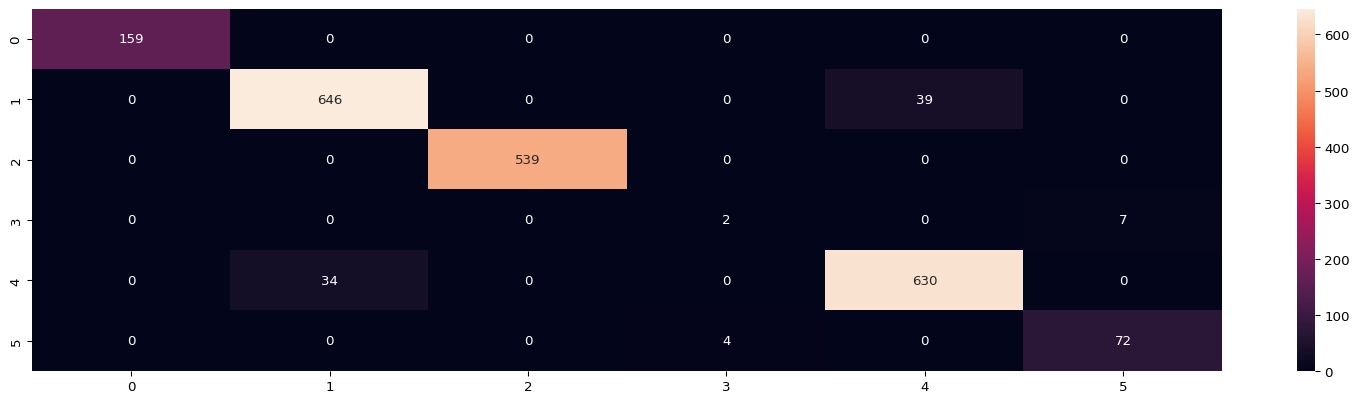

In [ ]:
# Create the heatmap for the confusion matrix generated by Logistic Regression testing predictions
# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
cm_data = pd.DataFrame(lg_confusion_matrix,columns =labels ,index =labels)

# Create a heatmap for the confusion matrix.
plt.figure(figsize=(20,5),dpi = 96,frameon = True)
sns.heatmap(cm_data,annot = True,fmt = 'd')
plt.show()

**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       0.95      0.94      0.95       685
           2       1.00      1.00      1.00       539
           3       0.33      0.22      0.27         9
           4       0.94      0.95      0.95       664
           5       0.91      0.95      0.93        76

    accuracy                           0.96      2132
   macro avg       0.86      0.84      0.85      2132
weighted avg       0.96      0.96      0.96      2132



**Q** Which classes were identified correctly without any misclassification?

**A** Other than class 3 all are identified correctly without any misclassification.

**Q** Which class has the lowest f1-score?

**A** Class 3 has lowest f1-score.

**After this activity, labels should be predicted for the target columns using the test features set and the Logistic Regression model should be evaluated for the same.**

---

**Write your interpretation of the results here.**

- Interpretation 1:


- Interpretation 2:

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project80**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project80** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---